C:\Users\joypa\AppData\Local\Temp\ipykernel_22748\1976700796.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['CRASH TIME'] = pd.to_datetime(data['CRASH TIME']).dt.time
C:\Users\joypa\AppData\Local\Temp\ipykernel_22748\1976700796.py:25: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = data.pivot_table(index='DAY OF WEEK', columns='HOUR OF DAY', values='COLLISION_ID', aggfunc='count')


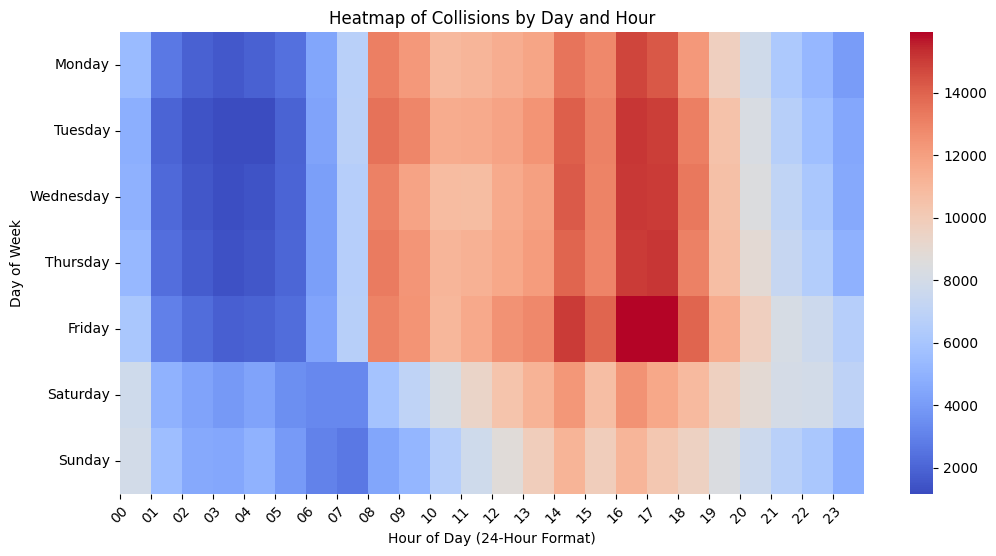

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
 
# Load the dataset
data = pd.read_csv('F:/Works/Data Visualisation/Datasets/motor_collision_cleaned.csv', low_memory=False)
 
# Convert date and time columns
data['CRASH DATE'] = pd.to_datetime(data['CRASH DATE'])
data['CRASH TIME'] = pd.to_datetime(data['CRASH TIME']).dt.time
 
# Extract day of week and hour of day
data['DAY OF WEEK'] = data['CRASH DATE'].dt.day_name()
 
# Reorder days of the week to start from Monday
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
data['DAY OF WEEK'] = pd.Categorical(data['DAY OF WEEK'], categories=days_order, ordered=True)
 
data['HOUR OF DAY'] = data['CRASH TIME'].apply(lambda x: x.hour)
 
# Filter data to include only hours from 0 to 23
data = data[data['HOUR OF DAY'].between(0, 23)]
 
# Create a pivot table for the heatmap
pivot_table = data.pivot_table(index='DAY OF WEEK', columns='HOUR OF DAY', values='COLLISION_ID', aggfunc='count')
 
# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, cmap='coolwarm')
 
# Customizing the x-axis labels to display in 24-hour clock format
hour_labels = [f"{hour:02d}" for hour in range(24)]
plt.xticks(ticks=range(24), labels=hour_labels, rotation=45)
 
plt.title('Heatmap of Collisions by Day and Hour')
plt.xlabel('Hour of Day (24-Hour Format)')
plt.ylabel('Day of Week')

# Save the plot as an image file
plt.savefig('F:/Works/Data Visualisation/Final Plots/Heatmap.png', bbox_inches='tight')